<h1> Titanic EDA & Preprocessing <h1>

Semua code ini bertujuan untuk menganalisis dataset Titanic untuk menemukan faktor-faktor utama yang memengaruhi tingkat keselamatan (survival rate) penumpang. Proses ini melibatkan pembersihan data (data cleaning), analisis data eksplorasi (exploratory data analysis), feature engineering, dan visualisasi untuk mendapatkan insight. Tujuannya adalah untuk membangun pemahaman yang kuat tentang data sebelum membuat model machine learning untuk prediksi.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (6).csv


In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv", delimiter=",")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1> Data Cleaning & Preprocessing <h1>

Sebelum melakukan analisis, kita perlu membersihkan data.

.info() -> memberikan ringkasan tentang DataFrame, termasuk tipe data setiap column dan jumlah nilai non-null. Ini membantu kita mengidentifikasi column mana yang memiliki data kosong.

.isna().sum() -> menghitung jumlah nilai null (kosong) di setiap column. Dari sini, kita melihat bahwa column Age, Cabin, dan Embarked memiliki data yang hilang.

.duplicated().sum() -> memastikan tidak ada baris data yang identik (duplikat) dalam dataset. Data duplikat dapat menyebabkan bias dalam analisis. Hasilnya menunjukkan tidak ada duplikasi.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print("Jumlah duplikasi: ", train_df.duplicated().sum())

Jumlah duplikasi:  0


<h1> Handling Missing Values <h1>

Berdasarkan hasil .isna().sum(), column Age memiliki 177 nilai kosong. Untuk memutuskan cara mengisinya, kita pertama-tama memvisualisasikan distribusi data Age menggunakan histogram.

Grafik menunjukkan bahwa distribusi data Age sedikit miring ke kanan (skewed), yang berarti tidak terdistribusi normal sempurna. Untuk data yang skewed, mengisi nilai kosong dengan median adalah pilihan yang lebih baik daripada mean (rata-rata), karena median tidak terlalu terpengaruh oleh nilai outlier. Oleh karena itu, kita mengisi nilai NaN di column Age dengan nilai median-nya.

In [ ]:
# nunjukin berapa row yang null
train_df[train_df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


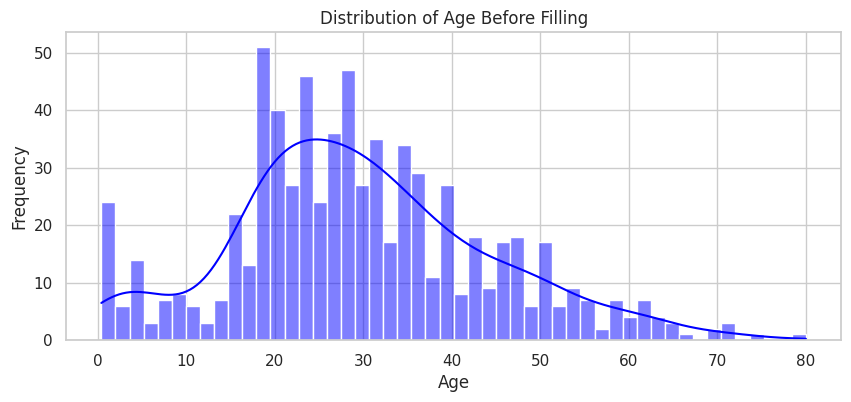

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(train_df.Age, kde=True, color='blue', bins=50)
plt.title('Distribution of Age Before Filling')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Dari grafik diatas, untuk menentukan metode mana yang cocok untuk mengisi data yang hilang. Kita harus melihat dulu distribusi data agenya. Berdasarkan grafik diatas, distribusi data ini memiliki bentuk yang mirip dengan distribusi normal, karena ada puncak yang relatif tinggi di sekitar usia muda (sekitar 20-an) dan kemudian menurun secara bertahap di kedua sisi. Namun, distribusi ini cenderung agak miring ke kanan, dengan ekor yang lebih panjang pada sisi kanan, yang mengindikasikan bahwa distribusi ini mungkin lebih condong ke distribusi skewed (tergeser).

Grafik ini juga untuk menjawab pertanyaan nomer 1 yang meminta descriptive analysis and identify data distribution. Kenapa saya hanya menggunakan age? Karena menurut saya age adalah data yang paling bisa di deskripsikan dan juga di analisis distribusi datanya apakah terdistribusi normal atau tidak.

In [ ]:
train_df['Age'] = train_df['Age'].fillna(round(train_df['Age'].median()))

Saya akhirnya memilih median, kenapa?
Median adalah pilihan yang baik untuk data skewed. Karena median adalah nilai tengah, ia tidak terpengaruh oleh pencilan atau distribusi yang terdistorsi (seperti skewed distribution). Jadi, meskipun distribusinya terbalik atau miring, median tetap memberikan representasi yang lebih tepat daripada mean.Median juga lebih tahan terhadap outlier dan distribusi yang tidak simetris.

<ipython-input-187-f10a8159458d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deck', y='Survived', data=train_df, errorbar=None, palette='viridis')


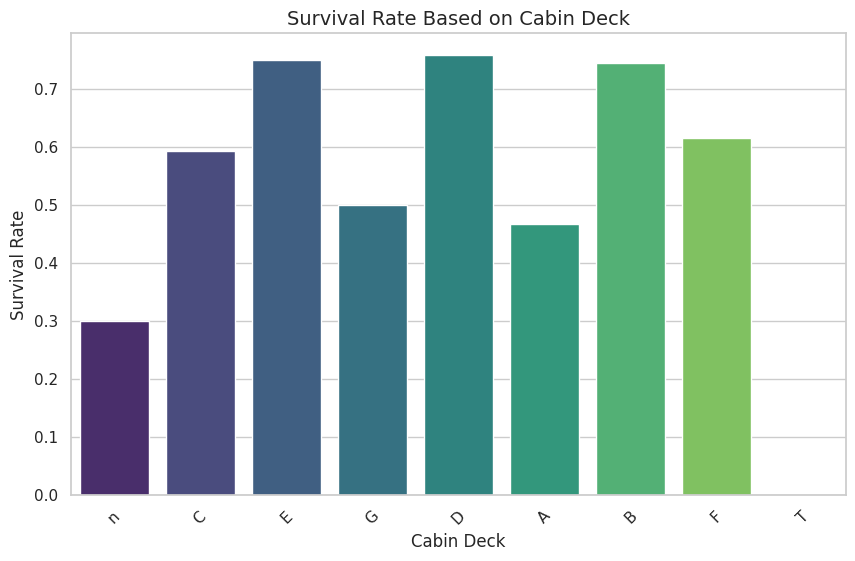

In [ ]:
train_df['Deck'] = train_df['Cabin'].apply(lambda x: str(x)[0] if x != 'Unknown' else 'Unknown')

plt.figure(figsize=(10, 6))

sns.barplot(x='Deck', y='Survived', data=train_df, errorbar=None, palette='viridis')

plt.title('Survival Rate Based on Cabin Deck', fontsize=14)
plt.xlabel('Cabin Deck', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [ ]:
train_df = train_df.drop(columns=['Cabin'])

Column Cabin memiliki 687 nilai kosong, yang merupakan jumlah yang sangat signifikan (lebih dari 70% data). Untuk melihat apakah column ini berguna, kita melakukan feature engineering sederhana dengan membuat column baru bernama Deck, yang diambil dari huruf pertama nomor kabin.

Setelah memvisualisasikan survival rate berdasarkan Deck, tidak ditemukan pola yang jelas atau korelasi yang kuat. Mengingat banyaknya data yang hilang dan kurangnya korelasi, diputuskan untuk menghapus (drop) column Cabin dari dataset.

In [ ]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


Column Embarked hanya memiliki 2 nilai kosong. Karena ini adalah data kategorikal, cara terbaik untuk mengisinya adalah dengan nilai yang paling sering muncul, yaitu mode. Ini memastikan kita tidak memasukkan kategori baru atau mengubah distribusi data secara signifikan.

<h1> Exploratory Data Analysis - EDA <h1>

In [ ]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,9
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S,n
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,687
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,S,D
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q,n
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,S,n
87,88,0,3,"Slocovski, Mr. Selman Francis",male,28.0,0,0,SOTON/OQ 392086,8.0500,S,n
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,S,n


In [ ]:
train_df.Age.value_counts()

,count
Age,
28.00,202
24.00,30
22.00,27
18.00,26
19.00,25
...,...
36.50,1
55.50,1
0.92,1


In [ ]:
train_df.Sex.value_counts()

,count
Sex,
male,577
female,314


In [ ]:
train_df.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


Ini adalah visualisasi distribusi Age setelah nilai-nilai kosong diisi. Terlihat ada puncak yang signifikan di sekitar median age, yang menunjukkan efek dari proses pengisian data. Distribusi data sekarang terlihat lebih mendekati normal, yang baik untuk beberapa model machine learning.

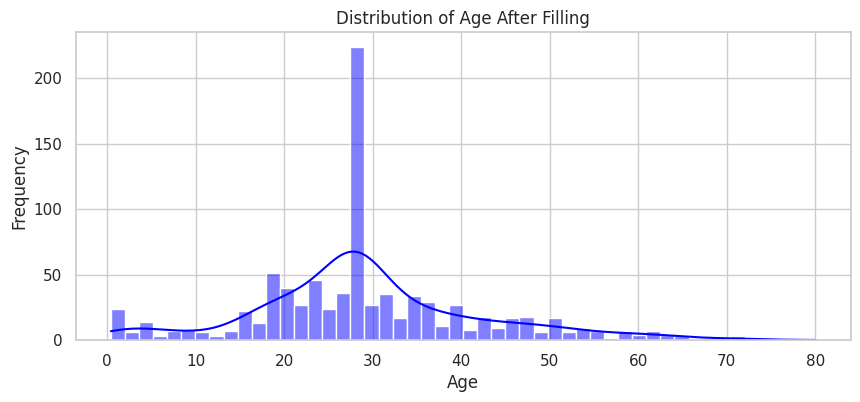

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(train_df.Age, kde=True, color='blue', bins=50)
plt.title('Distribution of Age After Filling')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Di bagian bawah ini, kita menganalisis hubungan antara berbagai fitur dengan tingkat keselamatan:

- Berdasarkan (Age_Group): Penumpang dikelompokkan berdasarkan usia. Grafik menunjukkan bahwa anak-anak (usia 0-10) memiliki survival rate tertinggi. Ini sesuai dengan protokol evakuasi "anak-anak dan wanita terlebih dahulu".

- Berdasarkan (Sex): Grafik dengan jelas menunjukkan bahwa penumpang perempuan (female) memiliki survival rate yang jauh lebih  tinggi (lebih dari 70%) dibandingkan laki-laki (male).

- Berdasarkan (Kelas Penumpang/Pclass): Analisis menunjukkan bahwa penumpang Kelas 1 memiliki survival rate tertinggi, diikuti oleh Kelas 2 dan Kelas 3. Ini mengindikasikan bahwa status sosial-ekonomi memainkan peran penting dalam keselamatan.

<ipython-input-197-941668d5ecb4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = train_df.groupby('Age_Group')['Survived'].mean()


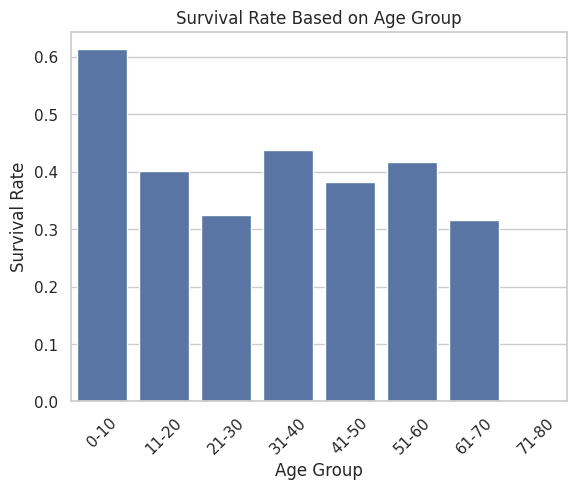

Age_Group
0-10     0.612903
11-20    0.401961
21-30    0.324937
31-40    0.437126
41-50    0.382022
51-60    0.416667
61-70    0.315789
71-80    0.000000
Name: Survived, dtype: float64
Pada grafik dibawah didapat bahwa yang memiliki tingkat survival rate paling tinggi adalah pada anak berumur 0-10 (anak kecil)
Karena dalam dunia nyata yang didahulukan memang anak kecil dan perempuan jika terjadi kecelakaan seperti ini


In [ ]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_survival_rate = train_df.groupby('Age_Group')['Survived'].mean()
sns.barplot(x=age_group_survival_rate.index, y=age_group_survival_rate.values)
plt.title('Survival Rate Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()
print(age_group_survival_rate)

print('Pada grafik dibawah didapat bahwa yang memiliki tingkat survival rate paling tinggi adalah pada anak berumur 0-10 (anak kecil)')
print('Karena dalam dunia nyata yang didahulukan memang anak kecil dan perempuan jika terjadi kecelakaan seperti ini')

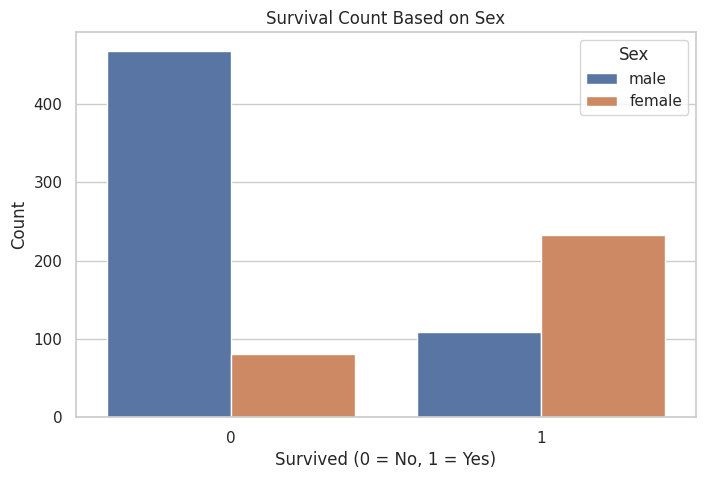

Berdasarkan table kita bisa mengetahui bahwa penumpang yang selamat kebanyakan ber jenis kelamin perempuan
Karena memang jika terjadi kecelakaan seperti ini, perempuan didahulukan dibandingkan laki-laki


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Count Based on Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
print('Berdasarkan table kita bisa mengetahui bahwa penumpang yang selamat kebanyakan ber jenis kelamin perempuan')
print('Karena memang jika terjadi kecelakaan seperti ini, perempuan didahulukan dibandingkan laki-laki')

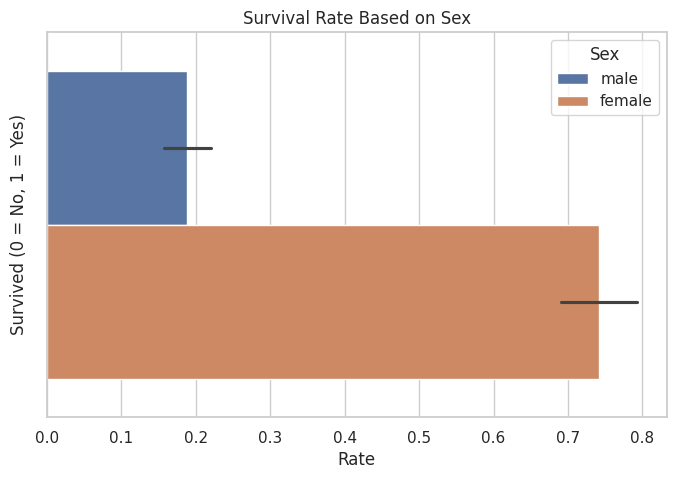

Disini dengan menggunakan .barplot kita mendapati bahwa survive rate dari female adalah >70%
Karena pada kenyataannya jika terjadi kecelakaan biasanya perempuan dan anak-anak lah yang didahulukan


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Rate Based on Sex')
plt.xlabel('Rate')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()
print('Disini dengan menggunakan .barplot kita mendapati bahwa survive rate dari female adalah >70%')
print('Karena pada kenyataannya jika terjadi kecelakaan biasanya perempuan dan anak-anak lah yang didahulukan')


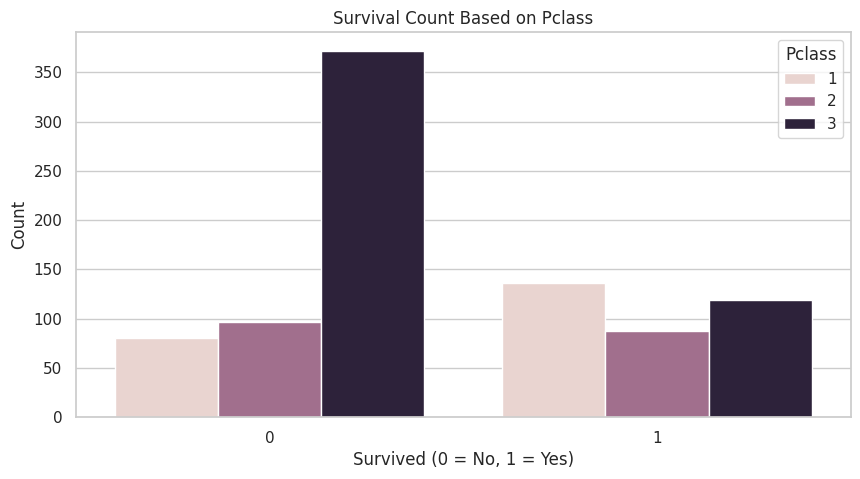

Berdasarkan grafik barplot ini kita bisa mengetahui bahwa jumlah penumpang yang selamat kebanyakan berada di class 1
Diikuti oleh penumpang class 3 dan juga 2


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Count Based on Pclass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
print('Berdasarkan grafik barplot ini kita bisa mengetahui bahwa jumlah penumpang yang selamat kebanyakan berada di class 1')
print('Diikuti oleh penumpang class 3 dan juga 2')

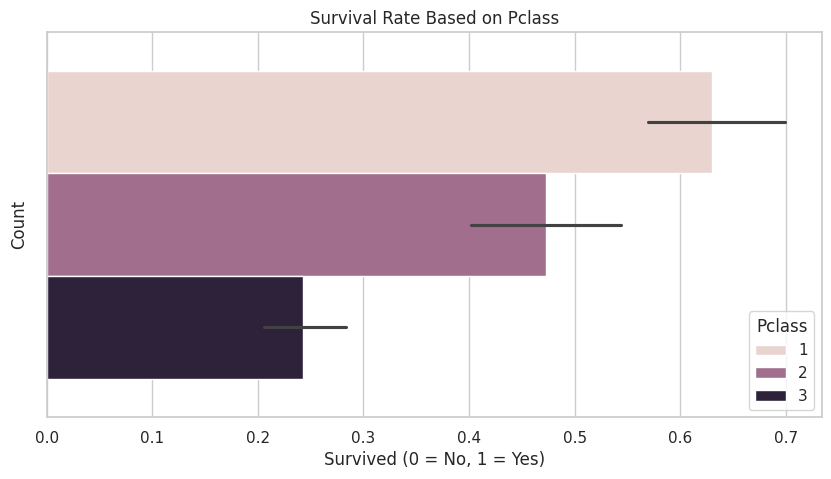

Untuk persentase survive rate, jika digabung menggunakan .barplot maka bisa terlihat yang memiliki survive rate tertinggi berada di class 1
Hal ini menandakan the more you pay, most likely you will survive


In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Rate Based on Pclass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
print('Untuk persentase survive rate, jika digabung menggunakan .barplot maka bisa terlihat yang memiliki survive rate tertinggi berada di class 1')
print('Hal ini menandakan the more you pay, most likely you will survive')

<h1> Feature Engineering dan Feature Selection <h1>

Langkah ini bertujuan untuk mengubah data menjadi format yang lebih sesuai untuk model machine learning dan memilih fitur yang paling relevan.

Model machine learning bekerja dengan angka, bukan teks. Oleh karena itu, kita perlu melakukan encoding pada column kategorikal:

- Sex: Menggunakan map untuk mengubah male menjadi 0 dan female menjadi 1 (Label Encoding).

- Pclass: Karena ada 3 kelas, kita menggunakan One-Hot Encoding dengan pd.get_dummies. Ini membuat column baru (Pclass_2, Pclass_3) dengan nilai boolean (True/False). drop_first=True digunakan untuk menghindari multicollinearity.

- Embarked: Menggunakan map untuk mengubah nilai C, Q, S menjadi 0, 1, 2.

Untuk memilih fitur terbaik, kita menggunakan heatmap korelasi untuk melihat hubungan antar variabel numerik. Berdasarkan heatmap dan analisis sebelumnya, beberapa column dihapus:

- Ticket, Fare, PassengerId, Name: Dihapus karena tidak memiliki korelasi yang kuat dengan survival rate atau hanya merupakan identifier unik.

- SibSp, Parch, Embarked: Meskipun mungkin memiliki sedikit pengaruh, untuk analisis ini, kita fokus pada fitur dengan korelasi terkuat seperti Pclass, Age, dan Sex.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

train_df = pd.get_dummies(train_df, columns=['Pclass'], drop_first=True)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


train_df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Age_Group,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,n,21-30,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,C,31-40,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,n,21-30,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,C,31-40,False,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,n,31-40,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2,n,21-30,True,False
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2,B,11-20,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,2,n,21-30,False,True
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,0,C,21-30,False,False


Kenapa saya melakukan encoding? Karena pada data yang saya gunakan masih terdapat data yang dalam category. Endocing berguna untuk mengubah data category ini ke dalam bentuk numerik. Karena komputer lebih cepat dan lebih akurat jika datanya dalam bentuk numerik.

Kenapa pclass1 di drop? Sebenernya itu terserah, tapi saya memilih pclass1 yang di drop karena lebih enak dibaca

Sebagai contoh penggunaan encoding adalah Sex karena hanya ada 2 nilai maka kita bisa menggunakan 0-> Male dan 1-> Female

Pada Pclass, karena Pclass ada 3 nilai, maka salah satu harus saya drop. Untuk contoh penggunaannya adalah

Jika Pclass2=False dan Pclass3=False, dia berada di Pclass1

Jika Pclass2=True dan Pclass3=False, dia berada di Pclass2

Jika Pclass2=False dan Pclass3=True, dia berada di Pclass3

Begitu juga pada column Embarked dengan mengubahnya menjadi 'C' = 0, 'Q' = 1, 'S' = 2

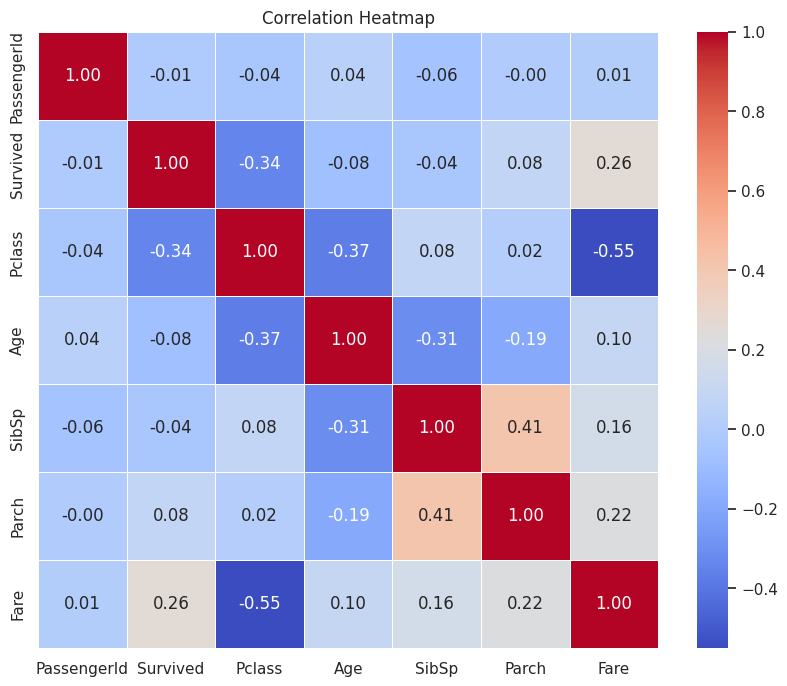

In [ ]:
train_df = pd.read_csv('train.csv')
numeric_columns = train_df.select_dtypes(include=['number']).columns
numeric_df = train_df[numeric_columns]


corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
train_df.drop("Ticket", axis=1, inplace=True)
train_df.drop("Fare", axis=1, inplace=True)
train_df.drop("PassengerId", axis=1, inplace=True)
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("SibSp", axis=1, inplace=True)
train_df.drop("Parch", axis=1, inplace=True)
train_df.drop("Embarked", axis=1, inplace=True)
#drop semua column yang tidak berpengaruh ke kesimpulan akhir

Ticket dan Fare saya drop karena bertabrakan dengan Pclass, saya mendapati dari heatmap bahwa pengaruh Pclass lebih besar.

PassengerId hanya berisi ID unik dari setiap penumpang, Name, Sibsp hanya berisi jumlah siblings dan juga spouse, Parch hanya berisi jumlah parent dan juga childe, dan Embarked hanya berisi penumpang ini dipick-up dari port mana.

Maka dari itu saya drop semua karena saya tidak menggunakannya dalam analisa Survive Rate karena tidak ada korelasinya.

Menurut saya data/column yang korelasinya paling besar adalah Pclass, Age, dan juga Sex

<h1> Feature Scaling <h1>

Feature scaling adalah proses untuk menstandarkan rentang nilai dari fitur independen. Di sini, kita menggunakan Normalization (dengan MinMaxScaler) pada column Age.

- Tujuan: Normalization mengubah skala nilai Age menjadi rentang antara 0 dan 1.

- Alasan Pemilihan: Normalization cocok digunakan karena data Age (setelah diisi) sudah terdistribusi secara relatif normal dan tidak memiliki outlier yang ekstrim. Jika data memiliki banyak outlier atau tidak terdistribusi normal, Standardization akan menjadi pilihan yang lebih baik.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

train_df['Age'] = min_max_scaler.fit_transform(train_df[['Age']])
train_df

Saya menggunakan Normalization dibandingkan dengan Standardization karena, pada data age sudah tidak ada outliers lagi dan sudah terdistribusi normal
Standardization digunakan jika datanya tidak terdistribusi normal dan memiliki outliers


,Survived,Pclass,Sex,Age,Cabin
0,0,3,male,0.271174,NaN
1,1,1,female,0.472229,C85
2,1,3,female,0.321438,NaN
3,1,1,female,0.434531,C123
4,0,3,male,0.434531,NaN
...,...,...,...,...,...
886,0,2,male,0.334004,NaN
887,1,1,female,0.233476,B42
888,0,3,female,NaN,NaN
889,1,1,male,0.321438,C148


In [ ]:
Saya menggunakan Normalization dibandingkan dengan Standardization karena, pada data age sudah tidak ada outliers lagi dan sudah terdistribusi normal
Standardization digunakan jika datanya tidak terdistribusi normal dan memiliki outliers